In [114]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [49]:
hospital = pd.read_csv("./hospitalizations.csv")

In [50]:
epidemiology = pd.read_csv("./epidemiology.csv")

In [67]:
it_hospital = hospital[hospital["location_key"] == "IT"]
it_epidemiology = epidemiology[epidemiology["location_key"] == "IT"]

In [68]:
it_data = pd.merge(it_hospital, it_epidemiology, on="date")

In [70]:
# Create a Plotly figure
fig = go.Figure()

# Add trace for 'current_hospitalized_patients' on the first y-axis
fig.add_trace(
    go.Scatter(
        x=it_data['date'],
        y=it_data['current_hospitalized_patients'],
        mode='lines',
        name='Current Hospitalized Patients',
        yaxis='y1'
    )
)

# Add trace for 'new_confirmed' on the second y-axis
fig.add_trace(
    go.Scatter(
        x=it_data['date'],
        y=it_data['new_confirmed'],
        mode='lines',
        name='New Confirmed Cases',
        yaxis='y2'
    )
)

# Update layout to include a second y-axis
fig.update_layout(
    title="Italy hospitalisations and confirmed cases",
    xaxis=dict(title='Date'),
    yaxis=dict(
        title='Current Hospitalized Patients',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='New Confirmed Cases',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()

Text(0, 0.5, 'Correlation')

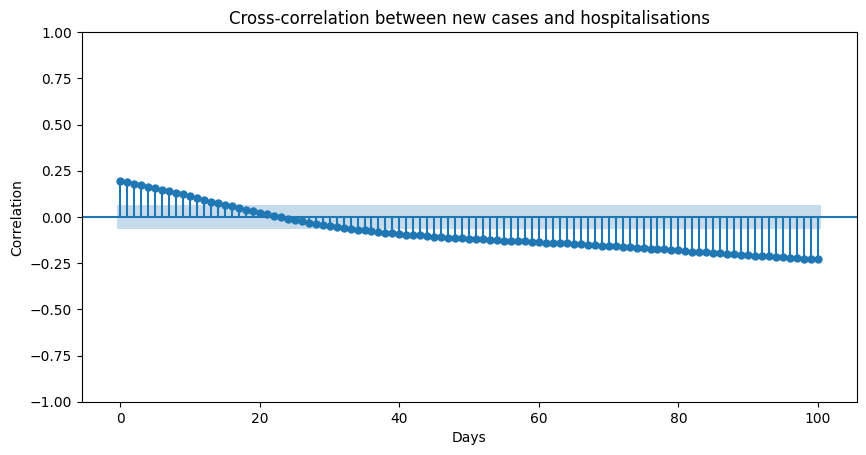

In [120]:
plot_ccf(it_data["new_confirmed"], it_data["current_hospitalized_patients"], lags=100, title="Cross-correlation between new cases and hospitalisations").set_figwidth(10)
plt.xlabel("Days")
plt.ylabel("Correlation")